In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [5]:
data = pd.read_csv('kc_house_data.csv')

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
zip = data.zipcode.tolist()

In [8]:
pop = pd.read_csv('pop-by-zip-code.csv')

In [9]:
pop.head()

,zip_code,y-2015
0,90001,57227
1,90002,50626
2,90003,69502
3,90004,64008
4,90005,38979


In [64]:
pop.sum()

zip_code    297549201
y-2015       51477121
dtype: int64

Merging the dataframes

In [10]:
data2 = pd.merge(data, pop, left_on='zipcode', right_on='zip_code')

In [11]:
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,y-2015
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,98178,25363
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,98178,25363
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,98178,25363
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,98178,25363
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,98178,25363


Verifying they're the same size

In [12]:
data.shape

(21597, 21)

In [13]:
data2.shape

(21597, 23)

Renaming and dropping extra columns

In [14]:
data2.drop(['zip_code'], axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,y-2015
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,25363
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,25363
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,25363
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,1300,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,25363
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,25363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2525049086,10/3/2014,2720000.0,4,3.25,3990,18115,2.0,0.0,0.0,...,3990,0.0,1989,NaN,98039,47.6177,-122.229,3450,16087,3120
21593,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,0.0,0.0,...,4065,0.0,1987,0.0,98039,47.6209,-122.237,3070,18713,3120
21594,3262300485,4/21/2015,2250000.0,5,5.25,3410,8118,2.0,NaN,0.0,...,3410,0.0,2006,0.0,98039,47.6295,-122.236,3410,16236,3120
21595,6447300365,11/13/2014,2900000.0,5,4.00,5190,14600,2.0,0.0,1.0,...,5190,0.0,2013,0.0,98039,47.6102,-122.225,3840,19250,3120


In [15]:
data2 = data2.rename(columns={'y-2015':'zipcode_pop'})

In [16]:
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,98178,25363
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,98178,25363
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,98178,25363
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,98178,25363
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,98178,25363


In [17]:
data2.sort_values(by=["zipcode_pop"])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop
21596,3262300818,2/27/2015,1870000.0,4,3.75,3790,8797,2.0,0.0,0.0,...,500.0,2006,NaN,98039,47.6351,-122.236,2660,12150,98039,3120
21568,5425700205,5/20/2014,1800000.0,4,3.50,4460,16953,1.0,NaN,0.0,...,1910.0,1962,NaN,98039,47.6338,-122.232,1980,13370,98039,3120
21567,3262300322,4/8/2015,1650000.0,4,3.25,3640,13530,1.0,0.0,0.0,...,1070.0,1924,2000.0,98039,47.6293,-122.238,2760,15000,98039,3120
21566,5425700150,8/4/2014,787500.0,4,1.75,1580,9382,1.0,0.0,0.0,...,500.0,1963,0.0,98039,47.6353,-122.232,2010,9382,98039,3120
21565,3738000070,3/9/2015,1710000.0,5,2.50,2660,6572,1.0,0.0,0.0,...,700.0,1959,0.0,98039,47.6176,-122.223,3960,14595,98039,3120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,23500220,10/15/2014,550120.0,5,2.50,2620,8050,1.0,NaN,0.0,...,1100.0,1975,0.0,98052,47.6919,-122.115,2030,7676,98052,62216
8048,1523550220,3/28/2015,639900.0,3,2.50,2330,4160,2.0,0.0,0.0,...,0.0,1992,0.0,98052,47.6367,-122.109,2940,4500,98052,62216
8047,1243100191,1/22/2015,372000.0,3,1.00,2298,10140,1.0,0.0,0.0,...,0.0,1969,0.0,98052,47.6909,-122.083,2580,24724,98052,62216
8053,9510970530,4/24/2015,680000.0,3,2.50,2120,3600,2.0,0.0,0.0,...,0.0,2005,0.0,98052,47.6649,-122.082,2540,4592,98052,62216


I want to figure out how population affects home prices.  
I can count up the number of homes per zip.  
The area will be hard to figure out. I'll do listings per zip.  

In [18]:
listings_in_zip = data2.groupby(['zip_code'])['id'].count()

In [19]:
listings_in_zip

zip_code
98001    361
98002    199
98003    280
98004    317
98005    168
        ... 
98177    255
98178    262
98188    136
98198    280
98199    317
Name: id, Length: 70, dtype: int64

In [20]:
listings_in_zip = listings_in_zip.to_frame()

In [21]:
listings_in_zip = listings_in_zip.rename(columns={'id':'listings_in_zip'})

In [22]:
listings_in_zip

,listings_in_zip
zip_code,
98001,361
98002,199
98003,280
98004,317
98005,168
...,...
98177,255
98178,262
98188,136


In [23]:
data3 = pd.merge(data2, listings_in_zip, left_on='zip_code', right_on='zip_code')

In [24]:
data3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop,listings_in_zip
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,98178,25363,262
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,1945,0.0,98178,47.5009,-122.248,1190,6780,98178,25363,262
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,1967,0.0,98178,47.5091,-122.244,2660,8712,98178,25363,262
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,1961,NaN,98178,47.5053,-122.255,1320,7619,98178,25363,262
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,1931,0.0,98178,47.5048,-122.272,1650,8775,98178,25363,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2525049086,10/3/2014,2720000.0,4,3.25,3990,18115,2.0,0.0,0.0,...,1989,NaN,98039,47.6177,-122.229,3450,16087,98039,3120,50
21593,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,0.0,0.0,...,1987,0.0,98039,47.6209,-122.237,3070,18713,98039,3120,50
21594,3262300485,4/21/2015,2250000.0,5,5.25,3410,8118,2.0,NaN,0.0,...,2006,0.0,98039,47.6295,-122.236,3410,16236,98039,3120,50
21595,6447300365,11/13/2014,2900000.0,5,4.00,5190,14600,2.0,0.0,1.0,...,2013,0.0,98039,47.6102,-122.225,3840,19250,98039,3120,50


In [25]:
data3.sort_values(by=["listings_in_zip"])


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop,listings_in_zip
21596,3262300818,2/27/2015,1870000.0,4,3.75,3790,8797,2.0,0.0,0.0,...,2006,NaN,98039,47.6351,-122.236,2660,12150,98039,3120,50
21568,5425700205,5/20/2014,1800000.0,4,3.50,4460,16953,1.0,NaN,0.0,...,1962,NaN,98039,47.6338,-122.232,1980,13370,98039,3120,50
21567,3262300322,4/8/2015,1650000.0,4,3.25,3640,13530,1.0,0.0,0.0,...,1924,2000.0,98039,47.6293,-122.238,2760,15000,98039,3120,50
21566,5425700150,8/4/2014,787500.0,4,1.75,1580,9382,1.0,0.0,0.0,...,1963,0.0,98039,47.6353,-122.232,2010,9382,98039,3120,50
21565,3738000070,3/9/2015,1710000.0,5,2.50,2660,6572,1.0,0.0,0.0,...,1959,0.0,98039,47.6176,-122.223,3960,14595,98039,3120,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,4310701575,6/10/2014,429000.0,3,3.25,1410,1246,3.0,0.0,0.0,...,2005,0.0,98103,47.6981,-122.340,1410,1253,98103,48600,602
5266,1931300688,4/29/2015,533000.0,3,3.00,1280,1085,3.0,0.0,0.0,...,2004,0.0,98103,47.6569,-122.346,1300,1310,98103,48600,602
5267,4083302485,4/20/2015,913000.0,3,1.75,2170,4000,1.0,0.0,0.0,...,1925,NaN,98103,47.6546,-122.337,1890,4000,98103,48600,602
5259,2402100205,11/19/2014,412133.0,2,1.00,920,4400,1.0,0.0,0.0,...,1948,0.0,98103,47.6903,-122.332,1560,4600,98103,48600,602


The hot market score is calculated as a ratio of the number of home for sale in the zip code per the zip code population. 

In [26]:
data3['hot_market_score'] = round(((data3['listings_in_zip']/data3['zipcode_pop'])*1000), 1)

In [27]:
data3.hot_market_score

0        10.3
1        10.3
2        10.3
3        10.3
4        10.3
         ... 
21592    16.0
21593    16.0
21594    16.0
21595    16.0
21596    16.0
Name: hot_market_score, Length: 21597, dtype: float64

In [28]:
data3.sort_values(by=['hot_market_score'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop,listings_in_zip,hot_market_score
16220,2422049104,12/30/2014,235000.0,2,1.00,830,9000,1.0,0.0,0.0,...,0.0,98032,47.3813,-122.243,1160,7680,98032,36368,125,3.4
16249,1253200290,2/12/2015,265000.0,4,1.75,1860,9112,1.0,0.0,0.0,...,0.0,98032,47.3792,-122.282,1570,9112,98032,36368,125,3.4
16248,3832600080,5/4/2015,270000.0,3,2.25,1740,7345,1.0,0.0,0.0,...,0.0,98032,47.3663,-122.285,1770,8250,98032,36368,125,3.4
16247,1440700190,6/23/2014,269950.0,4,2.50,2540,8400,2.0,0.0,0.0,...,0.0,98032,47.3754,-122.277,1600,8050,98032,36368,125,3.4
16246,3832500790,4/20/2015,309000.0,4,2.00,2240,9240,1.0,0.0,0.0,...,0.0,98032,47.3666,-122.288,2040,8250,98032,36368,125,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17613,7852011070,1/9/2015,1140000.0,6,3.75,5960,20197,2.0,0.0,4.0,...,NaN,98065,47.5398,-121.869,3860,12800,98065,13977,308,22.0
17612,7852110070,6/8/2014,567500.0,3,2.50,2300,7398,2.0,0.0,0.0,...,0.0,98065,47.5369,-121.876,2580,6983,98065,13977,308,22.0
17611,7853301930,10/9/2014,405000.0,3,2.50,1960,6997,2.0,0.0,0.0,...,0.0,98065,47.5415,-121.887,2320,5178,98065,13977,308,22.0
17618,7853250070,4/17/2015,679975.0,4,2.50,3830,4644,2.0,0.0,0.0,...,0.0,98065,47.5384,-121.880,3400,6163,98065,13977,308,22.0


In [29]:
data3.sort_values(by=['price'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop,listings_in_zip,hot_market_score
17189,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,...,NaN,98168,47.4739,-122.280,1700,10387,98168,32569,269,8.3
21156,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,0.0,98014,47.6499,-121.909,1200,7500,98014,6973,124,17.8
17200,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,...,0.0,98168,47.4808,-122.315,860,9000,98168,32569,269,8.3
2722,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,0.0,98146,47.4987,-122.341,1140,11250,98146,26730,288,10.8
17018,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,0.0,98168,47.4799,-122.296,1572,10570,98168,32569,269,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13533,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,0.0,98004,47.6232,-122.220,4600,21750,98004,32587,317,9.7
21552,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,NaN,98039,47.6289,-122.233,3560,24345,98039,3120,50,16.0
21560,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,0.0,98039,47.6305,-122.240,4540,42730,98039,3120,50,16.0
13576,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,2001.0,98004,47.6500,-122.214,3930,25449,98004,32587,317,9.7


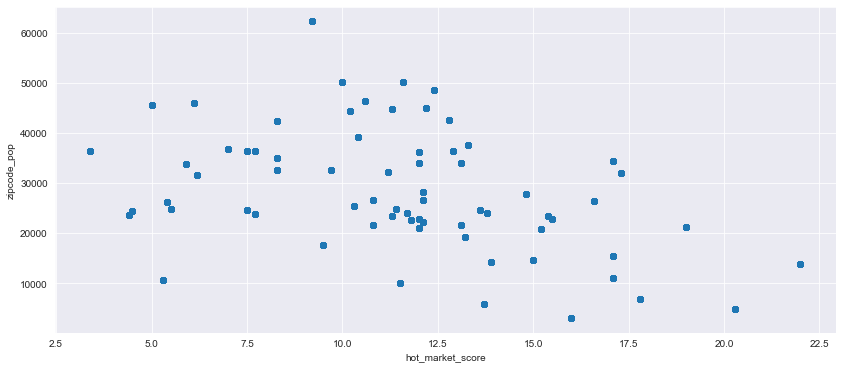

In [30]:
plt.figure(figsize=(14,6))
plt.scatter(data3.hot_market_score, data3.zipcode_pop)
plt.xlabel("hot_market_score")
plt.ylabel("zipcode_pop")
plt.show()

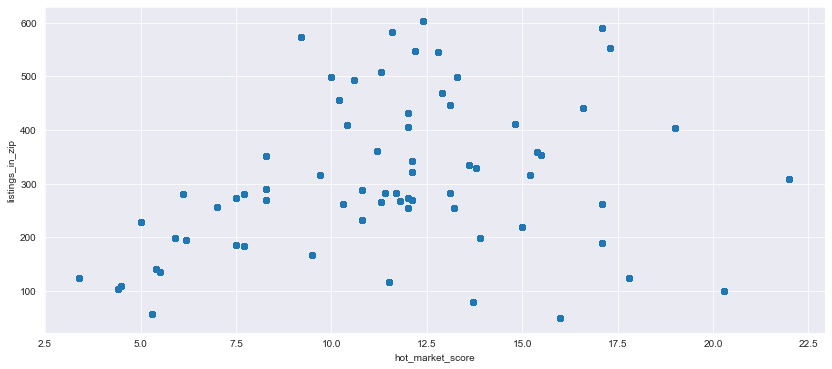

In [31]:
plt.figure(figsize=(14,6))
plt.scatter(data3.hot_market_score, data3.listings_in_zip)
plt.xlabel("hot_market_score")
plt.ylabel("listings_in_zip")
plt.show()

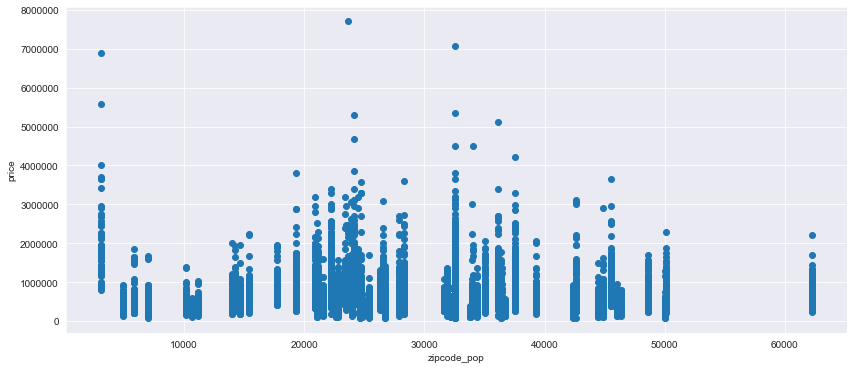

In [32]:
plt.figure(figsize=(14,6))
plt.scatter(data3.zipcode_pop, data3.price)
plt.xlabel("zipcode_pop")
plt.ylabel("price")
plt.show()

In [33]:
# data3.to_csv('kc_house_data_with_pop.csv')
# Note: have renamed this df lower down. Don't need to use it

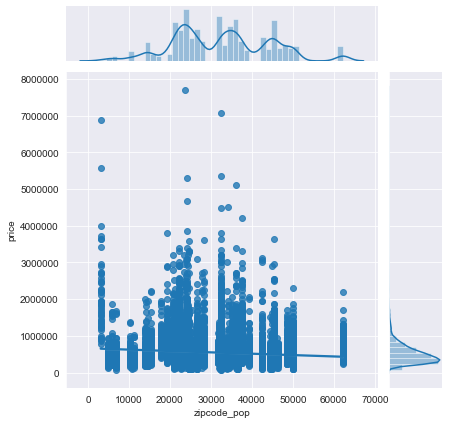

In [34]:
sns.jointplot(x = data3.zipcode_pop,y=data3.price, data=data3, kind='reg')

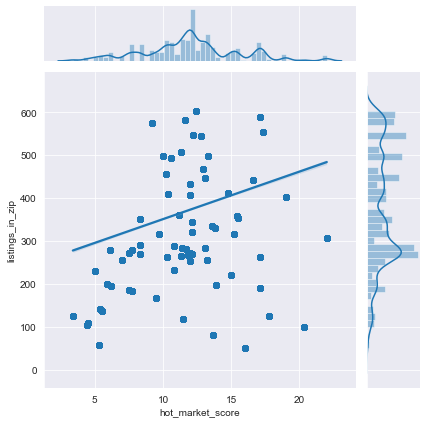

In [35]:
sns.jointplot(x = data3.hot_market_score,y=data3.listings_in_zip, kind='reg')

In [36]:
data3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop,listings_in_zip,hot_market_score
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,...,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,...,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,98077.951845,32449.068065,373.153540,12.014104
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,...,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,53.513072,11679.840337,136.034324,3.467865
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,98001.000000,3120.000000,50.000000,3.400000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,98033.000000,23488.000000,269.000000,10.200000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,98065.000000,32569.000000,354.000000,12.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,98118.000000,42380.000000,498.000000,13.600000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,98199.000000,62216.000000,602.000000,22.000000


In [37]:
price_zip_mean = data3.groupby(['zip_code'])['price'].mean()

In [38]:
price_zip_mean = price_zip_mean.to_frame()
price_zip_mean

,price
zip_code,
98001,2.811949e+05
98002,2.342840e+05
98003,2.941113e+05
98004,1.356524e+06
98005,8.102897e+05
...,...
98177,6.764194e+05
98178,3.106128e+05
98188,2.890783e+05


In [39]:
price_zip_mean = price_zip_mean.rename(columns={'price':'price_zip_mean'})

In [40]:
price_zip_mean.head()

,price_zip_mean
zip_code,
98001,2.811949e+05
98002,2.342840e+05
98003,2.941113e+05
98004,1.356524e+06
98005,8.102897e+05


In [41]:
data3 = pd.merge(data3, price_zip_mean, left_on='zip_code', right_on='zip_code')
data3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,zip_code,zipcode_pop,listings_in_zip,hot_market_score,price_zip_mean
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,98178,47.5112,-122.257,1340,5650,98178,25363,262,10.3,310612.755725
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,98178,47.5009,-122.248,1190,6780,98178,25363,262,10.3,310612.755725
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,2.0,...,98178,47.5091,-122.244,2660,8712,98178,25363,262,10.3,310612.755725
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,0.0,...,98178,47.5053,-122.255,1320,7619,98178,25363,262,10.3,310612.755725
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,98178,47.5048,-122.272,1650,8775,98178,25363,262,10.3,310612.755725


In [42]:
data3.price_zip_mean.describe()

count    2.159700e+04
mean     5.402966e+05
std      2.344425e+05
min      2.342840e+05
25%      3.594963e+05
50%      4.936253e+05
75%      6.452442e+05
max      2.161300e+06
Name: price_zip_mean, dtype: float64

In [43]:
data3.price_zip_mean.nunique()

70

Drop the extra zip code column

In [44]:
data3 = data3.drop(['zip_code'], axis=1)

In [45]:
data3.to_csv('kc_house_data_with_zip_data.csv')

In [46]:
# Renaming the df 'with_zip_data'

### Going to remove all the individual house data and just use zip code data

In [47]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21597 non-null  int64  
 1   date              21597 non-null  object 
 2   price             21597 non-null  float64
 3   bedrooms          21597 non-null  int64  
 4   bathrooms         21597 non-null  float64
 5   sqft_living       21597 non-null  int64  
 6   sqft_lot          21597 non-null  int64  
 7   floors            21597 non-null  float64
 8   waterfront        19221 non-null  float64
 9   view              21534 non-null  float64
 10  condition         21597 non-null  int64  
 11  grade             21597 non-null  int64  
 12  sqft_above        21597 non-null  int64  
 13  sqft_basement     21597 non-null  object 
 14  yr_built          21597 non-null  int64  
 15  yr_renovated      17755 non-null  float64
 16  zipcode           21597 non-null  int64 

In [48]:
data_zip = data3.drop_duplicates(subset=['zipcode'], keep='first')

In [49]:
len(data_zip)

70

In [50]:
col_names = list(data3.columns)
col_names             

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'zipcode_pop',
 'listings_in_zip',
 'hot_market_score',
 'price_zip_mean']

In [51]:
cols_to_keep = [
 'zipcode',
 'zipcode_pop',
 'listings_in_zip',
 'hot_market_score',
 'price_zip_mean']

In [52]:
cols_to_drop = []
for name in col_names:
    if name not in cols_to_keep:
        cols_to_drop.append(name)
cols_to_drop

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [53]:
data_zip = data_zip.drop(cols_to_drop, axis=1)
data_zip.head()

,zipcode,zipcode_pop,listings_in_zip,hot_market_score,price_zip_mean
0,98178,25363,262,10.3,310612.755725
262,98125,39254,409,10.4,469928.767726
671,98028,21568,283,13.1,462488.869258
954,98136,15415,263,17.1,551768.520913
1217,98074,26530,441,16.6,685675.843537


In [54]:
data_zip.to_csv('kc_housing_zip_data')

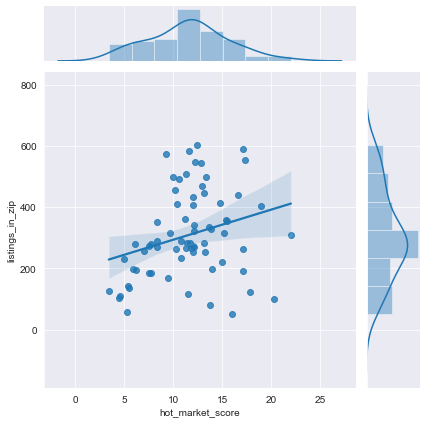

In [55]:
sns.jointplot(x = data_zip.hot_market_score,y=data_zip.listings_in_zip, kind='reg')

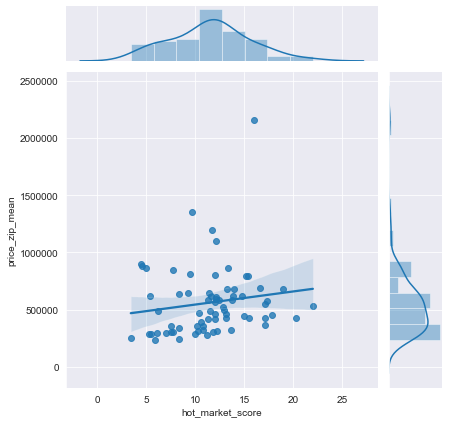

In [56]:
sns.jointplot(x = data_zip.hot_market_score,y=data_zip.price_zip_mean, kind='reg')

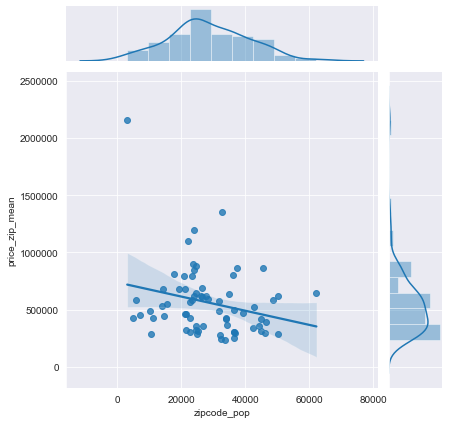

In [57]:
sns.jointplot(x = data_zip.zipcode_pop,y=data_zip.price_zip_mean, kind='reg')

In [58]:
data_zip

,zipcode,zipcode_pop,listings_in_zip,hot_market_score,price_zip_mean
0,98178,25363,262,10.3,3.106128e+05
262,98125,39254,409,10.4,4.699288e+05
671,98028,21568,283,13.1,4.624889e+05
954,98136,15415,263,17.1,5.517685e+05
1217,98074,26530,441,16.6,6.856758e+05
...,...,...,...,...,...
20746,98072,22779,273,12.0,5.700735e+05
21019,98188,24836,136,5.5,2.890783e+05
21155,98014,6973,124,17.8,4.556171e+05
21279,98055,22659,268,11.8,3.042621e+05


In [59]:
data_zip.sort_values(by=['listings_in_zip'], ascending = False)

,zipcode,zipcode_pop,listings_in_zip,hot_market_score,price_zip_mean
5032,98103,48600,602,12.4,5.850488e+05
2909,98038,34362,589,17.1,3.670915e+05
3639,98115,50134,583,11.6,6.199441e+05
7668,98052,62216,574,9.2,6.452442e+05
8654,98117,31921,553,17.3,5.768348e+05
...,...,...,...,...,...
16504,98102,23655,104,4.4,8.996077e+05
15235,98010,4918,100,20.3,4.236660e+05
19863,98024,5847,80,13.7,5.861209e+05
11299,98148,10659,57,5.3,2.849086e+05


Because I'm going to merge this df back with the other df, I'm going to remove `price_zip_mean`. I'll already have prices in the other one. 

In [60]:
data_zip.drop(['price_zip_mean'], axis=1, inplace=True)

In [61]:
data_zip

,zipcode,zipcode_pop,listings_in_zip,hot_market_score
0,98178,25363,262,10.3
262,98125,39254,409,10.4
671,98028,21568,283,13.1
954,98136,15415,263,17.1
1217,98074,26530,441,16.6
...,...,...,...,...
20746,98072,22779,273,12.0
21019,98188,24836,136,5.5
21155,98014,6973,124,17.8
21279,98055,22659,268,11.8


Save it, and I'm done.

In [62]:
data_zip.to_csv('kc_housing_zip_data.csv')